In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
def dflatlon2gdf(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

coast = gpd.read_file('data/shapefiles/Coastline_Antarctica_v02.shp')
shelf = gpd.read_file('data/shapefiles/IceShelf_Antarctica_v02.shp')
ground = gpd.read_file('data/shapefiles/GroundingLine_Antarctica_v02.shp')
di = dflatlon2gdf(pd.read_csv('data/gl_tianli_2020/ICESat2_I.csv')).to_crs(coast.crs)
dh = dflatlon2gdf(pd.read_csv('data/gl_tianli_2020/ICESat2_H.csv')).to_crs(coast.crs)
df = dflatlon2gdf(pd.read_csv('data/gl_tianli_2020/ICESat2_F.csv')).to_crs(coast.crs)

In [3]:
! cat data/gl_tianli_2020/readme.txt

The ICESat-2-derived grounding zone features of the Antarctica Ice Sheet between 30 March 2019 and 30 September 2020 are provided as three separate .csv files:

1- ‘ICESat2_F.csv’ for landward limit of tidal flexure 
2- ‘ICESat2_H.csv’ for inshore limit of hydrostatic equilibrium 
3- ‘ICESat2_I.csv’ for break-in-slope

The attributes of the data files are:

lat: latitude of the grounding zone feature (unit: decimal degree)
lon: longitude of the grounding zone feature (unit: decimal degree)
track: reference ground track number
beam_pair: ICESat-2 beam pair number
beam: ‘l’, ‘r’, ‘pair’ denote if the grounding zone feature is calculated from left-beam repeat-track data group, right-beam repeat-track data group, or beam-pair repeat-track data group
repeat_cycles_no: number of repeat cycles used in grounding zone calculation 
tide_range: the ocean tidal range at the inshore limit of hydrostatic equilibrium from the elevation anomalies of ICESat-2 repeat tracks (unit: meter)

For any questi

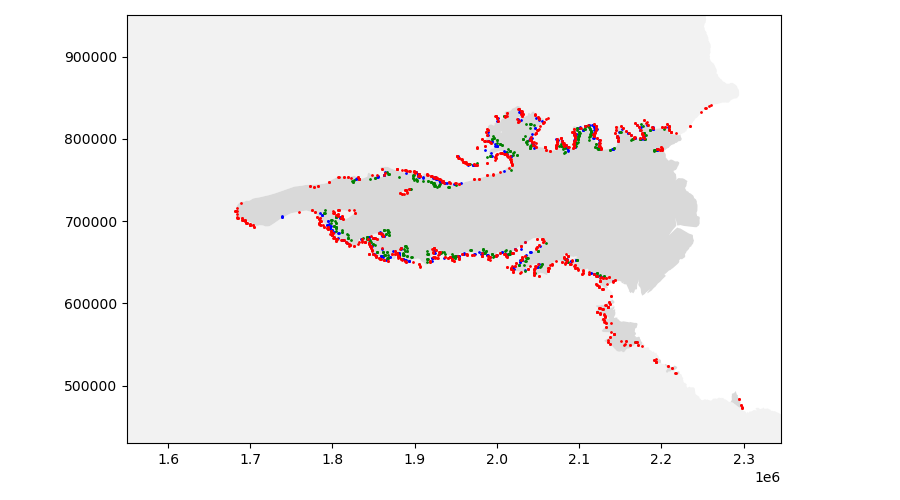

In [8]:
fig, ax = plt.subplots(figsize=[9,5])

tol = 100
ground.dissolve().simplify(tolerance=tol).plot(color=[0.95]*3, ax=ax, lw=0.5, alpha=1)
shelf.dissolve().simplify(tolerance=tol).plot(color=[0.85]*3, ax=ax, lw=0.5, alpha=1)
df.plot(color='b', ax=ax, markersize=1)
dh.plot(color='g', ax=ax, markersize=1)
di.plot(color='r', ax=ax, markersize=1)

ax.set_xlim((1550540, 2344906))
ax.set_ylim((430065, 950742))

fig.tight_layout()

In [10]:
# this doesn't work on cryocloud
import contextily as cx
cx.add_basemap(ax,
               crs=coast.crs.to_string(),
               source=cx.providers.Esri.WorldImagery
              )

ModuleNotFoundError: No module named 'contextily'

In [11]:
import xyzservices.providers as xyz

In [13]:
xyz.Esri.WorldImagery.url

'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}'